In [122]:
import pandas as pd

# ✅ Load metadata.csv
metadata_path = r"D:\Desktop\dermproject\data\metadata.csv"
df_metadata = pd.read_csv(metadata_path)

In [123]:
# ✅ Display basic information
print("🔹 First 5 rows:")
print(df_metadata.head())

🔹 First 5 rows:
        isic_id copyright_licence  \
0  ISIC_1064919          CC-BY-NC   
1  ISIC_2708737             CC-BY   
2  ISIC_1944865             CC-BY   
3  ISIC_0032083          CC-BY-NC   
4  ISIC_0028959          CC-BY-NC   

                                            full_url  full_size  \
0  https://content.isic-archive.com/e11a451e-56d3...     153259   
1  https://content.isic-archive.com/7fd26d90-cbbd...    1690118   
2  https://content.isic-archive.com/d74f790a-4fdd...    1141325   
3  https://content.isic-archive.com/bd3a61e1-10b8...      19579   
4  https://content.isic-archive.com/7b8adcca-2e9f...      26583   

                                             256_url  256_size  pixels_x  \
0  https://content.isic-archive.com/eed95197-f4fc...      3302      1872   
1  https://content.isic-archive.com/d0ea6212-39f0...      5031      6000   
2  https://content.isic-archive.com/2bfbd1eb-6bca...      3271      6000   
3  https://content.isic-archive.com/e0531cf3-420a...  

In [124]:
print("\n🔹 Dataset Info:")
print(df_metadata.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44164 entries, 0 to 44163
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 44164 non-null  object 
 1   copyright_licence       44164 non-null  object 
 2   full_url                44164 non-null  object 
 3   full_size               44164 non-null  int64  
 4   256_url                 44164 non-null  object 
 5   256_size                44164 non-null  int64  
 6   pixels_x                44164 non-null  int64  
 7   pixels_y                44164 non-null  int64  
 8   image_type              44163 non-null  object 
 9   concomitant_biopsy      44164 non-null  bool   
 10  sex                     43200 non-null  object 
 11  anatom_site_general     39085 non-null  object 
 12  benign_malignant        44164 non-null  object 
 13  diagnosis_1             44158 non-null  object 
 14  diagnosis_confirm_typ

In [125]:
print("\n🔹 Summary Statistics:")
print(df_metadata.describe())


🔹 Summary Statistics:
          full_size      256_size      pixels_x      pixels_y    age_approx
count  4.416400e+04  44164.000000  44164.000000  44164.000000  43099.000000
mean   5.041214e+05   5128.600987   2843.014061   1968.966466     50.471589
std    6.003082e+05   1886.746409   2206.505356   1453.506013     16.047316
min    1.605000e+03   1271.000000     85.000000     85.000000      0.000000
25%    3.662875e+04   3749.000000    640.000000    480.000000     40.000000
50%    1.534655e+05   4813.000000   1872.000000   1053.000000     50.000000
75%    9.526255e+05   6074.250000   5184.000000   4000.000000     60.000000
max    4.232756e+06  20848.000000   7360.000000   6000.000000     85.000000


In [126]:
print("\n🔹 Missing Values:")
print(df_metadata.isnull().sum())


🔹 Missing Values:
isic_id                       0
copyright_licence             0
full_url                      0
full_size                     0
256_url                       0
256_size                      0
pixels_x                      0
pixels_y                      0
image_type                    1
concomitant_biopsy            0
sex                         964
anatom_site_general        5079
benign_malignant              0
diagnosis_1                   6
diagnosis_confirm_type     1128
age_approx                 1065
lesion_id                  5079
patient_id                15794
dtype: int64


In [127]:
print("\n🔹 Number of Duplicates:", df_metadata.duplicated().sum())


🔹 Number of Duplicates: 0


In [128]:
categorical_cols = ["lesion_id", "diagnosis_confirm_type", "diagnosis_1", "benign_malignant","anatom_site_general", "sex" ]  # Replace with actual categorical columns
for col in categorical_cols:
    print(f"\n🔹 Unique values in {col}:")
    print(df_metadata[col].unique())



🔹 Unique values in lesion_id:
['IL_3752689' 'IL_2374200' 'IL_1790311' ... 'IL_7083858' 'IL_1262694'
 'IL_1633213']

🔹 Unique values in diagnosis_confirm_type:
['serial imaging showing no change' 'histopathology'
 'single image expert consensus' nan
 'confocal microscopy with consensus dermoscopy']

🔹 Unique values in diagnosis_1:
['Benign' 'Malignant' 'Indeterminate' nan]

🔹 Unique values in benign_malignant:
['benign' 'malignant']

🔹 Unique values in anatom_site_general:
['lower extremity' 'posterior torso' nan 'anterior torso' 'palms/soles'
 'upper extremity' 'head/neck' 'lateral torso' 'oral/genital']

🔹 Unique values in sex:
['male' 'female' nan]


Analyzing lesion_id


In [129]:
print("\n🔹 Number of Unique Lesion IDs:", df_metadata["lesion_id"].nunique())
print("\n🔹 Unique Lesion IDs:")
print(df_metadata["lesion_id"].unique()[:10])  # Show first 10 unique values



🔹 Number of Unique Lesion IDs: 33319

🔹 Unique Lesion IDs:
['IL_3752689' 'IL_2374200' 'IL_1790311' 'IL_1497139' 'IL_0372697' nan
 'IL_8532886' 'IL_3171860' 'IL_0794061' 'IL_4212775']


In [130]:
lesion_counts = df_metadata["lesion_id"].value_counts()
print("\n🔹 Lesion Frequency Distribution:")
print(lesion_counts.head(10))  # Show the top 10 most common lesion IDs



🔹 Lesion Frequency Distribution:
lesion_id
IL_5161836    23
IL_8314504    17
IL_7455346    17
IL_1405273    16
IL_3161017    16
IL_5560174    15
IL_5605169    15
IL_9808031    14
IL_2952301    14
IL_8811658    14
Name: count, dtype: int64


Analyzing diagnosis_1

In [131]:
print("\n🔹 Number of Unique diagnosis_1:", df_metadata["diagnosis_1"].nunique())
print("\n🔹 Unique diagnosis_1:")
print(df_metadata["diagnosis_1"].unique()[:10])  # Show first 10 unique values


🔹 Number of Unique diagnosis_1: 3

🔹 Unique diagnosis_1:
['Benign' 'Malignant' 'Indeterminate' nan]


In [132]:
print("\n🔹 Number of Missing Values in `diagnosis_1` Column:")
print(df_metadata["diagnosis_1"].isnull().sum())



🔹 Number of Missing Values in `diagnosis_1` Column:
6


In [133]:
print("\n🔹 Diagnosis Counts:")
print(df_metadata["diagnosis_1"].value_counts())



🔹 Diagnosis Counts:
diagnosis_1
Benign           36370
Malignant         7450
Indeterminate      338
Name: count, dtype: int64


Analyzing diagnosis_confirm_type

In [134]:
print("\n🔹 Number of Unique diagnosis_confirm_type:", df_metadata["diagnosis_confirm_type"].nunique())
print("\n🔹 Unique diagnosis_confirm_type:")
print(df_metadata["diagnosis_confirm_type"].unique()[:10])  # Show first 10 unique values


🔹 Number of Unique diagnosis_confirm_type: 4

🔹 Unique diagnosis_confirm_type:
['serial imaging showing no change' 'histopathology'
 'single image expert consensus' nan
 'confocal microscopy with consensus dermoscopy']


In [135]:
print("\n🔹 Number of Missing Values in `diagnosis_confirm_type` Column:")
print(df_metadata["diagnosis_confirm_type"].isnull().sum())


🔹 Number of Missing Values in `diagnosis_confirm_type` Column:
1128


In [136]:
print("\n🔹 Diagnosis Counts:")
print(df_metadata["diagnosis_confirm_type"].value_counts())


🔹 Diagnosis Counts:
diagnosis_confirm_type
serial imaging showing no change                 19132
histopathology                                   15876
single image expert consensus                     7674
confocal microscopy with consensus dermoscopy      354
Name: count, dtype: int64


Dropping columns

In [137]:
# ✅ Specify the columns to drop
columns_to_drop = ['copyright_licence', 'full_url', 'full_size', '256_url',
       '256_size', 'pixels_x', 'pixels_y', 'image_type', 'concomitant_biopsy', 'lesion_id', 'patient_id', 'diagnosis_1', 'diagnosis_confirm_type']  # Replace with actual column names

# ✅ Drop columns
df_metadata = df_metadata.drop(columns=columns_to_drop, axis=1)

print("\n✅ Updated DataFrame after dropping columns:")
print(df_metadata.head())


✅ Updated DataFrame after dropping columns:
        isic_id     sex anatom_site_general benign_malignant  age_approx
0  ISIC_1064919    male     lower extremity           benign        50.0
1  ISIC_2708737  female     posterior torso           benign        65.0
2  ISIC_1944865  female     lower extremity           benign        45.0
3  ISIC_0032083  female                 NaN           benign        55.0
4  ISIC_0028959    male      anterior torso           benign        45.0


In [138]:
print("\n🔹 Missing Values in Each Column:")
print(df_metadata.isnull().sum())


🔹 Missing Values in Each Column:
isic_id                   0
sex                     964
anatom_site_general    5079
benign_malignant          0
age_approx             1065
dtype: int64


Handling missing values

In [139]:
df_metadata["age_approx"] = df_metadata["age_approx"].fillna(df_metadata["age_approx"].median())
df_metadata["sex"] = df_metadata["sex"].fillna("unknown")
df_metadata["anatom_site_general"] = df_metadata["anatom_site_general"].fillna("unknown")

# ✅ Verify no missing values remain
print("\n🔹 Missing Values After Processing:")
print(df_metadata.isnull().sum())


🔹 Missing Values After Processing:
isic_id                0
sex                    0
anatom_site_general    0
benign_malignant       0
age_approx             0
dtype: int64


Correlation analysis

In [140]:
df_metadata["sex"] = df_metadata["sex"].map({"male": 0, "female": 1, "unknown": -1})

In [141]:
df_metadata["benign_malignant"] = df_metadata["benign_malignant"].map({"benign": 0, "malignant": 1})

In [142]:
correlation_matrix = df_metadata[["age_approx", "sex", "benign_malignant"]].corr()
print("\n🔹 Correlation Matrix:")
print(correlation_matrix)




🔹 Correlation Matrix:
                  age_approx       sex  benign_malignant
age_approx          1.000000 -0.126201          0.323554
sex                -0.126201  1.000000         -0.081973
benign_malignant    0.323554 -0.081973          1.000000


In [143]:
print("\n🔹 Unique Values in `anatom_site_general` Column:")
print(df_metadata["anatom_site_general"].unique())



🔹 Unique Values in `anatom_site_general` Column:
['lower extremity' 'posterior torso' 'unknown' 'anterior torso'
 'palms/soles' 'upper extremity' 'head/neck' 'lateral torso'
 'oral/genital']


In [146]:
df_metadata["anatom_site_general"] = df_metadata["anatom_site_general"].astype("category").cat.codes


In [147]:
df_metadata.head()


,isic_id,sex,anatom_site_general,benign_malignant,age_approx
0,ISIC_1064919,0,3,0,50.0
1,ISIC_2708737,1,6,0,65.0
2,ISIC_1944865,1,3,0,45.0
3,ISIC_0032083,1,7,0,55.0
4,ISIC_0028959,0,0,0,45.0


In [149]:
correlation_matrix = df_metadata.drop(columns=["isic_id"]).corr()
print("\n🔹 Correlation Between Anatomical Site and Benign/Malignant:")
print(correlation_matrix["benign_malignant"].sort_values(ascending=False))



🔹 Correlation Between Anatomical Site and Benign/Malignant:
benign_malignant       1.000000
age_approx             0.323554
anatom_site_general   -0.058494
sex                   -0.081973
Name: benign_malignant, dtype: float64


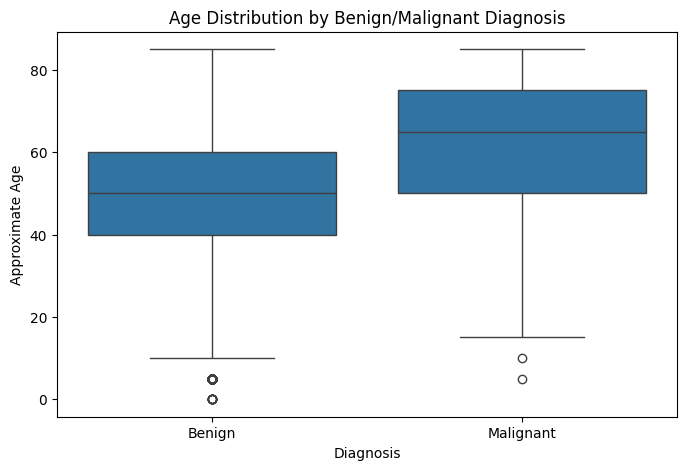

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_metadata["benign_malignant"], y=df_metadata["age_approx"])
plt.xticks([0, 1], ["Benign", "Malignant"])
plt.xlabel("Diagnosis")
plt.ylabel("Approximate Age")
plt.title("Age Distribution by Benign/Malignant Diagnosis")
plt.show()


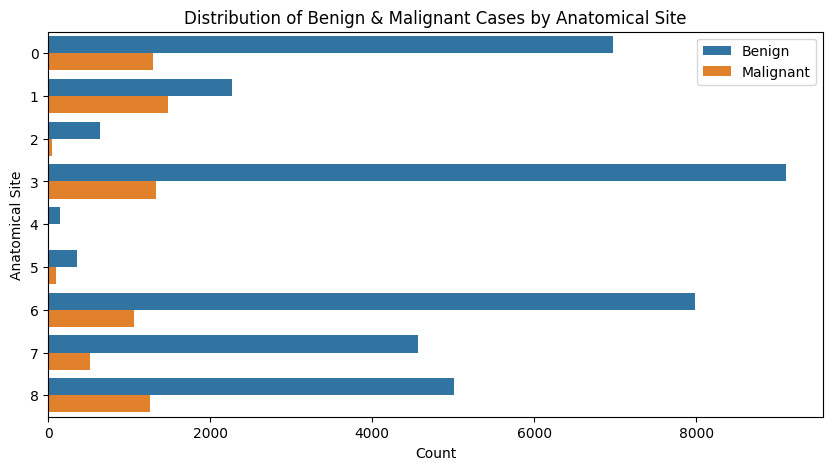

In [151]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df_metadata["anatom_site_general"], hue=df_metadata["benign_malignant"])
plt.title("Distribution of Benign & Malignant Cases by Anatomical Site")
plt.xlabel("Count")
plt.ylabel("Anatomical Site")
plt.legend(["Benign", "Malignant"])
plt.show()


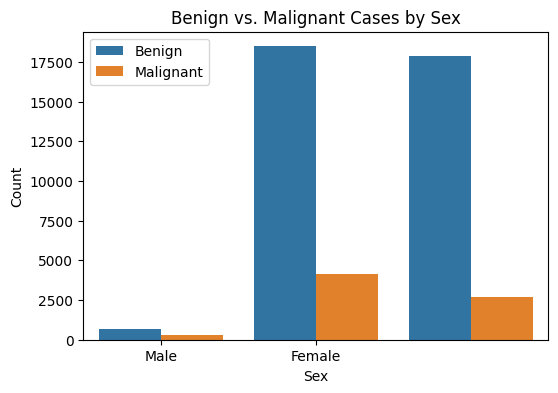

In [152]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_metadata["sex"], hue=df_metadata["benign_malignant"])
plt.xticks([0, 1], ["Male", "Female"])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Benign vs. Malignant Cases by Sex")
plt.legend(["Benign", "Malignant"])
plt.show()


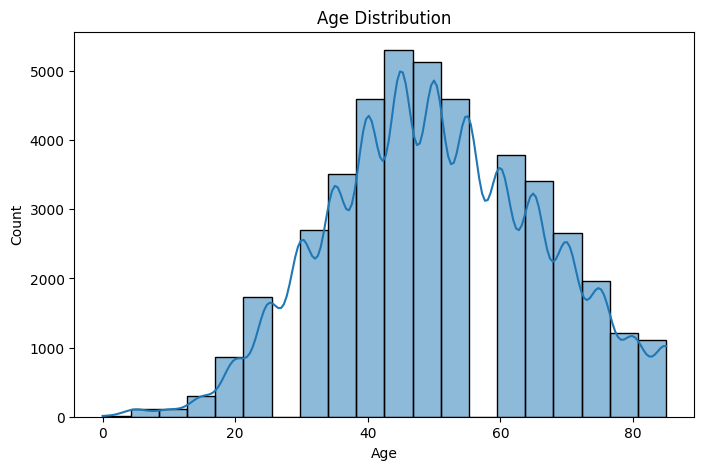

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_metadata["age_approx"], bins=20, kde=True)
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()


In [88]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df_metadata["diagnosis_1"], order=df_metadata["diagnosis_1"].value_counts().index)
plt.title("Diagnosis Distribution")
plt.show()


KeyError: 'diagnosis_1'

<Figure size 800x500 with 0 Axes>

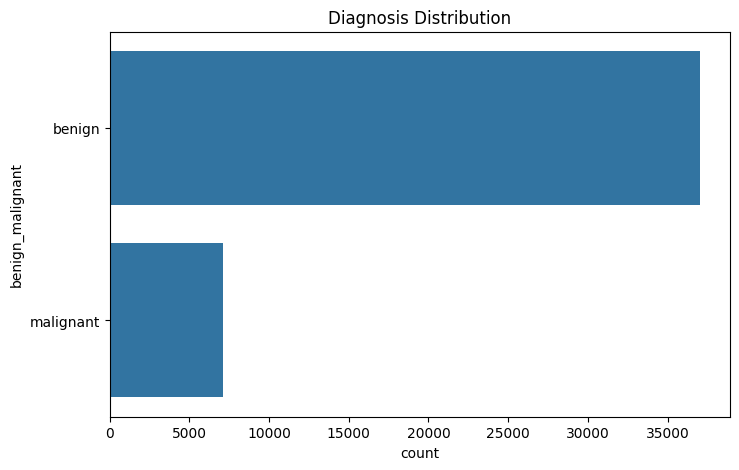

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df_metadata["benign_malignant"], order=df_metadata["benign_malignant"].value_counts().index)
plt.title("Diagnosis Distribution")
plt.show()